### 📝 Imports

In [1]:
import torch
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.append(os.path.abspath(".."))

from cats_dataset import CatsDataset
from src.augmentation.data_augmenter import DataAugmenter

from PIL import Image



c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


### 🔧 Config

In [2]:
image_size = 512

image_set_path = '../data/all_photos/'

# Directory to save augmented images
augmented_images_dir = '../data/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

### 🌐 Create Transforms

In [3]:
transform = transforms.Compose([
    DataAugmenter(target_image_size=512, augment_images=True),
    transforms.ToTensor()
])

DataAugmenter initialized


### 🚦 Load Dataset

In [4]:

dataset = CatsDataset(
    root_dir=image_set_path,
    transform=transform
)

### 🖼 Visualize and Save Augmented Images

DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.5372899].


Augmented images have been saved to '../data/augmented_images' directory.


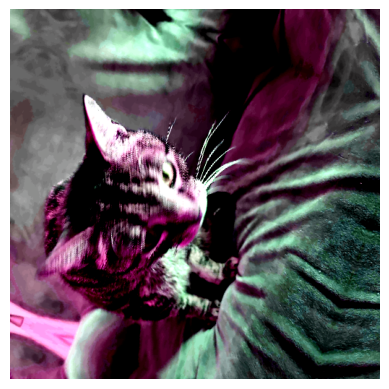

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.1036475].


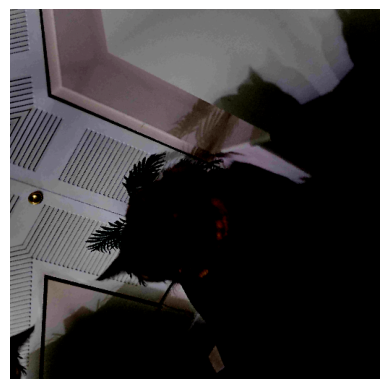

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.38848037..1.6160713].


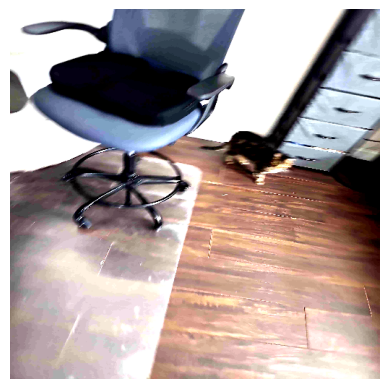

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.6160713].


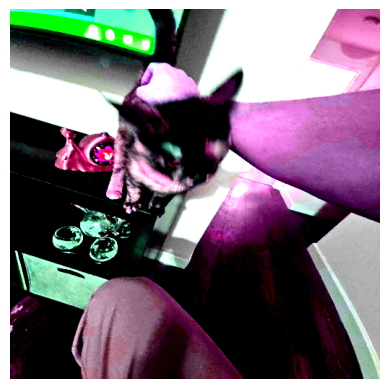

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6073178..1.611111].


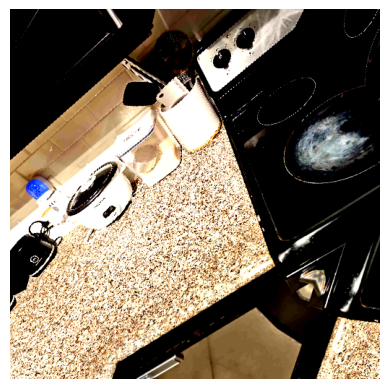

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.6160713].


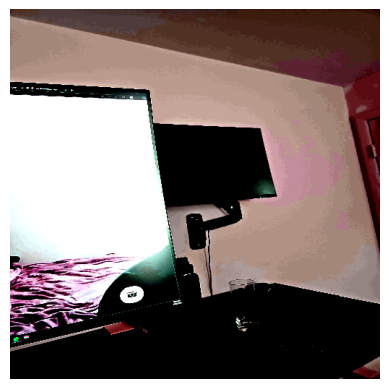

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.6160713].


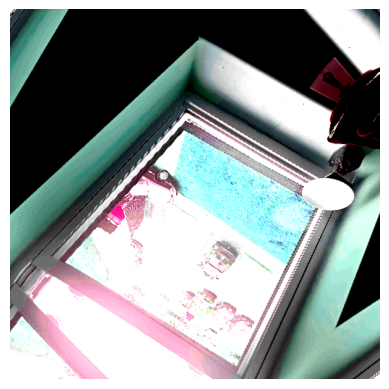

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..0.96831226].


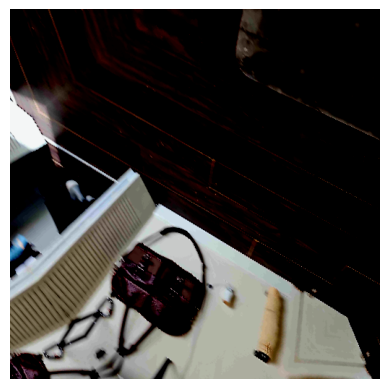

In [5]:
sample_loader = DataLoader(dataset, batch_size=8, shuffle=True)
data_iter = iter(sample_loader)
images, labels = next(data_iter)

def save_augmented_images(images, directory):
    for idx in range(images.size(0)):
        img = images[idx]
        # Unnormalize
        img = img * 0.5 + 0.5
        # Convert to NumPy array
        np_img = img.numpy()
        # Transpose to (H, W, C)
        np_img = np.transpose(np_img, (1, 2, 0))
        # Convert to PIL Image
        pil_img = Image.fromarray((np_img * 255).astype(np.uint8))
        # Save image
        pil_img.save(os.path.join(directory, f'augmented_image_{idx}.png'))

save_augmented_images(images, augmented_images_dir)
print(f"Augmented images have been saved to '{augmented_images_dir}' directory.")

def imshow(img):
    img = img * 0.5 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

for i in range(images.size(0)):
    imshow(images[i])

